# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition
In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
     0: Typical angina: chest pain related decrease blood supply to the heart
     1: Atypical angina: chest pain not related to heart
     2: Non-anginal pain: typically esophageal spasms (non heart related)
     3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
     serum = LDL + HDL + .2 * triglycerides
     above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
     0: Nothing to note
     1: ST-T Wave abnormality
         can range from mild symptoms to severe problems
         signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
         Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Importing all tools

# Regular EDA (Exploring Data Analysis) and plotting libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside notebook
%matplotlib inline 

# Importing models from SK-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("Data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

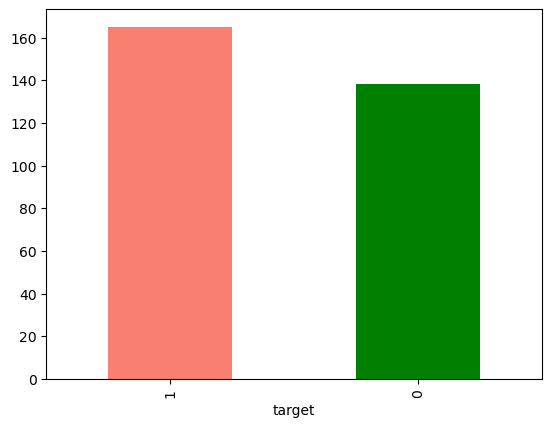

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "green"])

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Checking missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare Target Column With sex Col
pd.crosstab(df.target, df.sex) # crosstab gives us relation matrix between given psrams

sex,0,1
target,,
0,24,114
1,72,93


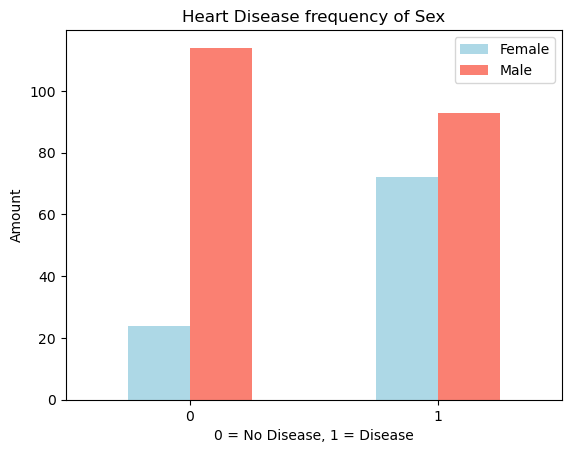

In [10]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["lightblue", "salmon"])

plt.title("Heart Disease frequency of Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # to make 0 and 1 at bottom perpendicular

# Age vs Max Heart Rate(thalach) for Heart Disease 

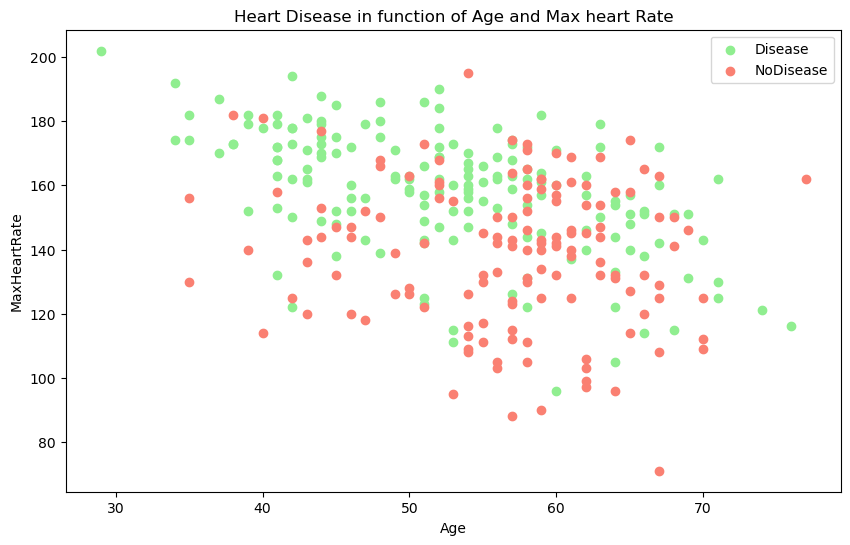

In [11]:
# Create another figure
plt.figure(figsize=(10, 6))
           
#Scatter with +vs egs
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color="lightgreen")
#Scatter with -vs egs
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="salmon")

plt.title("Heart Disease in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("MaxHeartRate")
plt.legend(["Disease", "NoDisease"])

<Axes: ylabel='Frequency'>

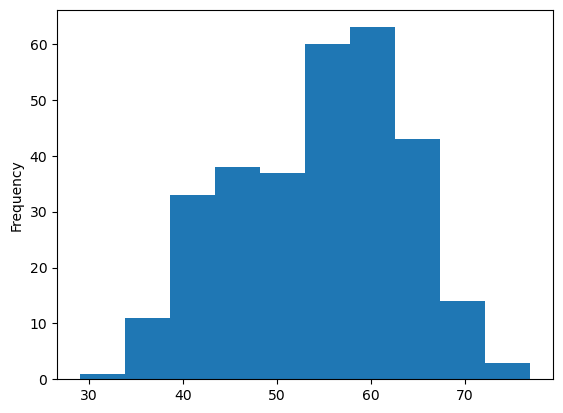

In [12]:
# Check the distribution of age col with hist # check age rough verification
df.age.plot.hist()

### Heart Disease Frequency per chest pain type

3. cp - chest pain type
     0: Typical angina: chest pain related decrease blood supply to the heart
     1: Atypical angina: chest pain not related to heart
     2: Non-anginal pain: typically esophageal spasms (non heart related)
     3: Asymptomatic: chest pain not showing signs of disease
     

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

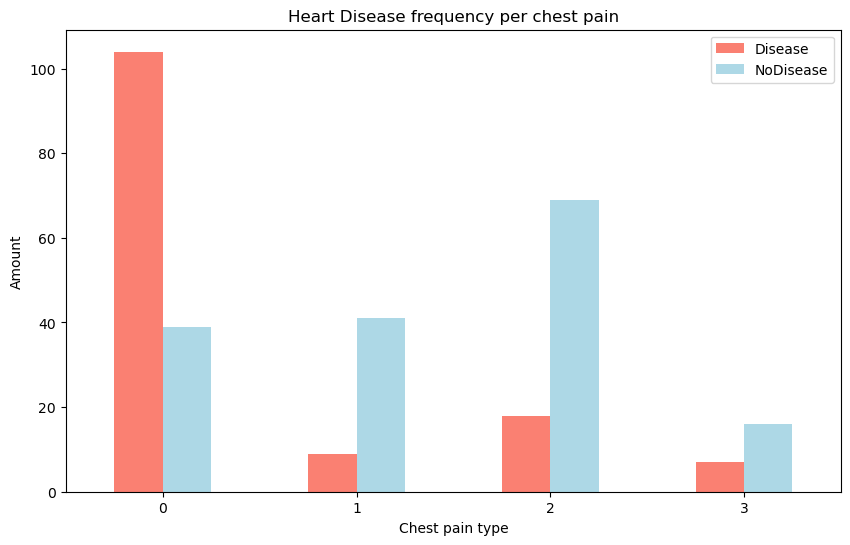

In [14]:
# make the crosstab visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color = ["salmon", "lightblue"])

plt.title("Heart Disease frequency per chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "NoDisease"])
plt.xticks(rotation=0)

In [15]:
 # Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


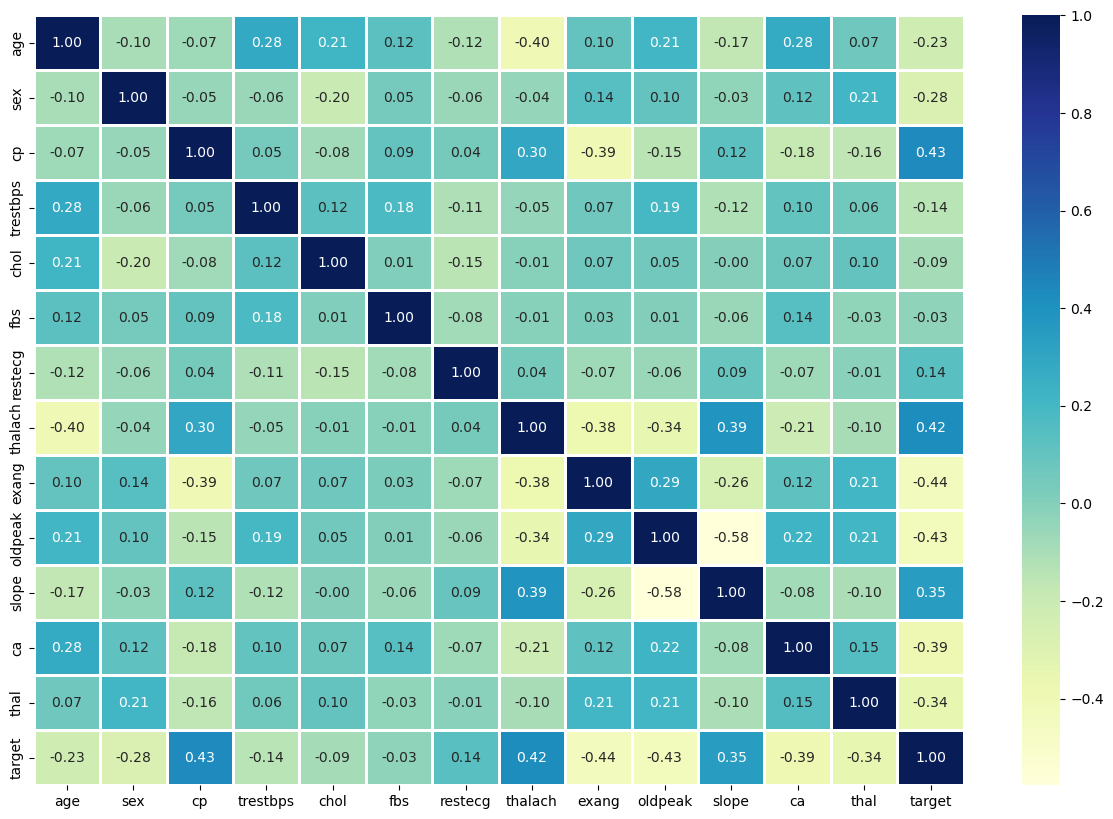

In [16]:
# Let's make correlation matrix better using seaborn
corr_matrix = df.corr() # Provides corellation matrix
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix
                 , annot=True # Wehter write values in cells?
                 , linewidths=1 # Space bw each cell
                 , fmt="0.2f" # 0.2 means 2 decimal values 
                 , cmap="YlGnBu") # color from plt https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


# +ve values one value goes up other does too || Variables that tend to go up or down together have high positive correlation coefficients
# -ve values one value increases other decreases || Variables that tend to go up or down in opposite directions have high negative correlation coefficients.

## 5 Modeling

In [17]:
# Split Data into X and Y

X = df.drop("target", axis=1)
Y = df.target

# Split data into train and test set

np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


We are going to try 3 different ML models
1. Logistic Regression
2. K-Nearest Negighbours Classifier
3. Random forest Classifier

In [18]:
# Put models in a dcitonary
models = {"Logistic Regression": LogisticRegression()
          ,"KNN": KNeighborsClassifier()
          ,"RandomForest": RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, Y_train, Y_test) :
    """
    Fits and evaluates given machine learning models.
    models : a dict of different skLearn ML models
    X_train : train data
    X_test : test data
    Y_train : train labels
    Y_test : test labels
    """
    np.random.seed(42)
    #Make dictonary to store model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(X_train, Y_train)
        #Evaluate the model and append its score to model_socres
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores


In [19]:
model_scores = fit_and_score(models = models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
model_scores

D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Next steps for model Improvement

Following \n
* ----------------------- These 2 are same for any model----------------------
* Hyperparameter tuning
* Features importance
* ---------------Following are specific for classification----------------------
* Confusion matrix
* cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* Roc curve
* Area under the curve

### Hyperparameter tuning

In [23]:
train_scores = []
test_scores = []

#Create a list of different values for n_neighbours
neighbours = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    #Fit the algo
    knn.fit(X_train, Y_train)
    #Update training scores list
    train_scores.append(knn.score(X_train, Y_train))
    #Update the test score list
    test_scores.append(knn.score(X_test, Y_test))
    

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

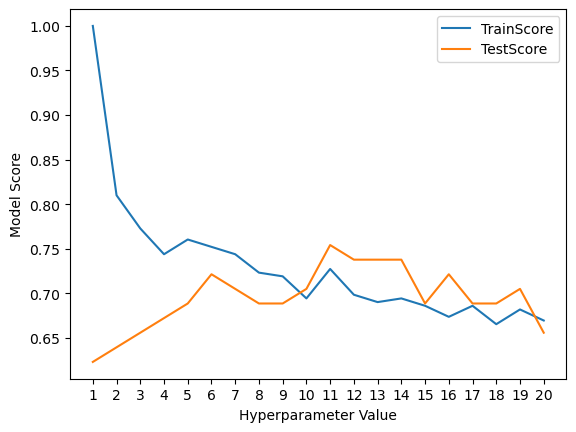

In [31]:
plt.plot(neighbours, train_scores, label="TrainScore")
plt.plot(neighbours, test_scores, label="TestScore")
plt.xticks(range(1,21,1)) 
plt.xlabel("Hyperparameter Value")
plt.ylabel("Model Score")
plt.legend()

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": range(10, 1000, 50)
           , "max_depth": [None, 3, 5, 10]
           , "min_samples_split": range(2,20,2)
           , "min_samples_leaf": range(1,20,2)
          }

In [49]:
# Tune Logisticregression
np.random.seed(42)

#Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit Random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, Y_train)
"---------Accuracy---------" , rs_log_reg.score(X_test, Y_test) , "---------BestParams---------", rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


('---------Accuracy---------',
 0.8852459016393442,
 '---------BestParams---------',
 {'solver': 'liblinear', 'C': 0.23357214690901212})

In [50]:
# Now Train RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#Fit
rs_rf.fit(X_train, Y_train)
"---------Accuracy---------" , rs_rf.score(X_test, Y_test) , "---------BestParams---------", rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


('---------Accuracy---------',
 0.8688524590163934,
 '---------BestParams---------',
 {'n_estimators': 210,
  'min_samples_split': 4,
  'min_samples_leaf': 19,
  'max_depth': 3})